In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image


from scipy import ndimage as nd

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
# from pypore3d.p3dBlobPy import *
# from pypore3d.p3dSkelPy import *
# from pypore3d.p3dSITKPy import *

import os
 
from poreUtils import *

from scipy.ndimage import distance_transform_edt


In [2]:
# Reading the image 
img_path = 'D:\\sagar\\Data\MD_1264_A2_1_Z3.3mm\\result\\600-900x1000-1300x1600-1900_8bit.raw'

x, y, z = 300, 300, 300

volc = py_p3dReadRaw8(img_path, x, y, z)
# Appying Median filter for removing noise
volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
# convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
vol = swigObjt2uint8Array(volc, x, y, z)       


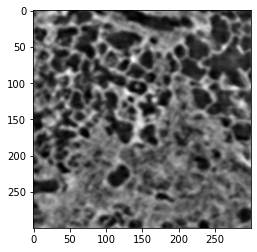

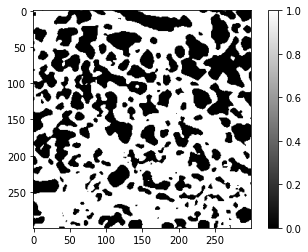

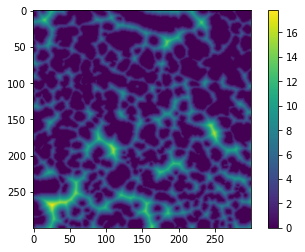

In [24]:
# Distance transform with a slice 
aSlice = vol[150, ...]
plt.imshow(aSlice, cmap='gray')
plt.show()

#Binarization
th_slice = aSlice > 55 
plt.imshow(th_slice, cmap='gray')
plt.colorbar()
plt.show()

# Distance transform 
distance = distance_transform_edt(th_slice)
plt.imshow(distance)
plt.colorbar()
plt.show()

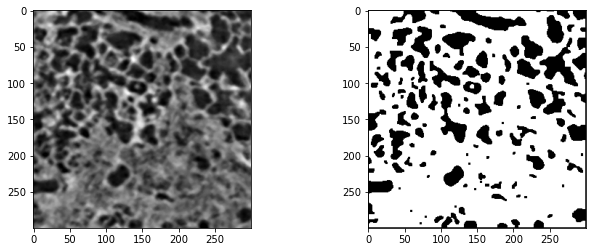

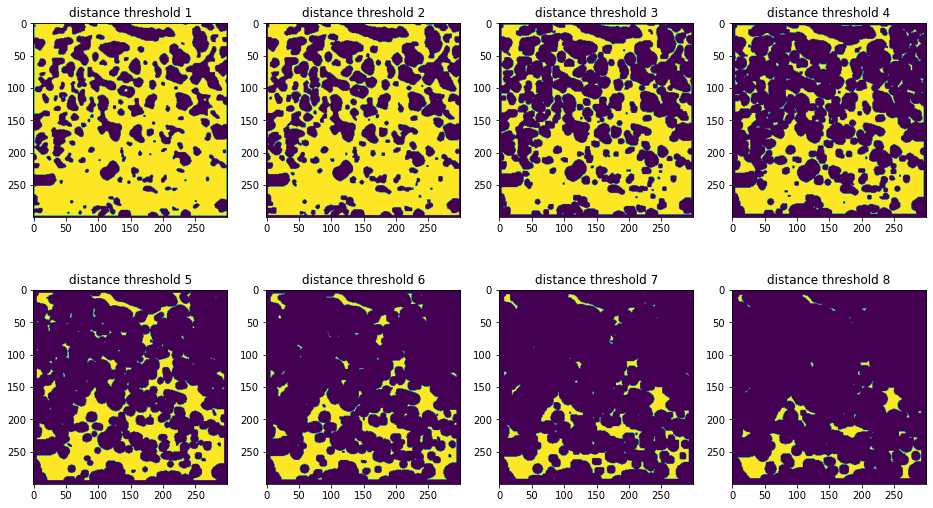

In [22]:
# Distance transform with 3d volume 
th_vol = vol > 40
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = nd.binary_opening(th_vol, np.ones((3,3,3)))
th_vol = nd.binary_opening(th_vol, np.ones((3,3,3)))
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_vol)



sliceNo = 150

fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].imshow(vol[sliceNo, ...], cmap='gray')
ax[1].imshow(th_vol[sliceNo, ...], cmap='gray')
plt.show()

fig, ax = plt.subplots(2,4, figsize=(16,9))

for i in range(4):
    img = dis3d[sliceNo, ...] > 1+i
    ax[0, i].imshow(img,)
    ax[0, i].set_title('distance threshold {}'.format(1+i))

for i in range(4):
    img = dis3d[sliceNo, ...] > 5+i
    ax[1, i].imshow(img,)
    ax[1, i].set_title('distance threshold {}'.format(5+i))

#plt.colorbar()
plt.show()

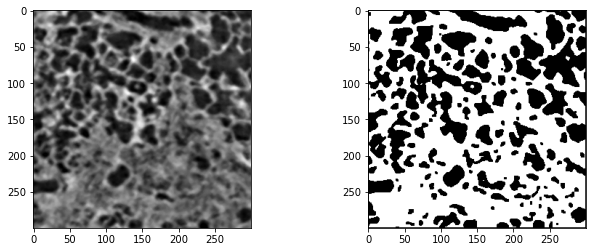

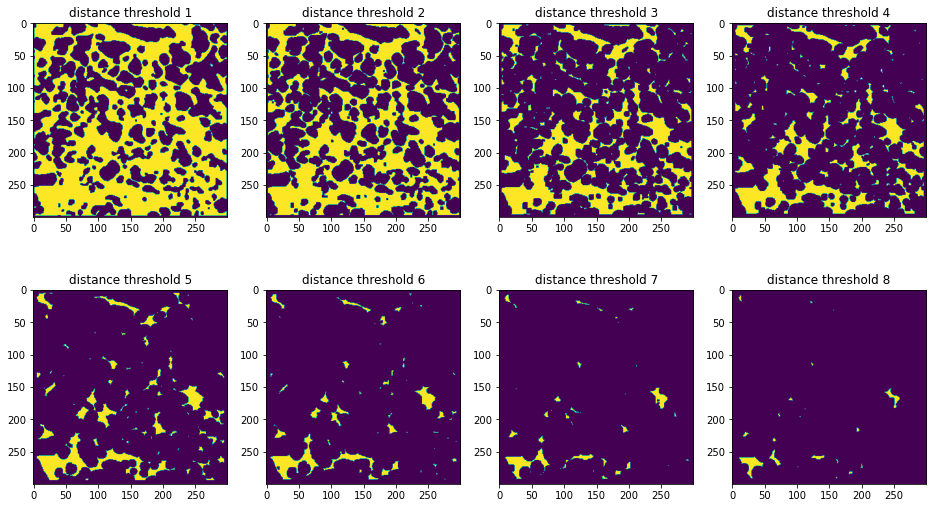

In [23]:
# Distance transform with 3d volume 
th_vol = vol > 55
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_vol)



sliceNo = 150

fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].imshow(vol[sliceNo, ...], cmap='gray')
ax[1].imshow(th_vol[sliceNo, ...], cmap='gray')
plt.show()

fig, ax = plt.subplots(2,4, figsize=(16,9))

for i in range(4):
    img = dis3d[sliceNo, ...] > 1+i
    ax[0, i].imshow(img,)
    ax[0, i].set_title('distance threshold {}'.format(1+i))

for i in range(4):
    img = dis3d[sliceNo, ...] > 5+i
    ax[1, i].imshow(img,)
    ax[1, i].set_title('distance threshold {}'.format(5+i))

#plt.colorbar()
plt.show()

In [61]:
img = dis3d[sliceNo, ...] > 2

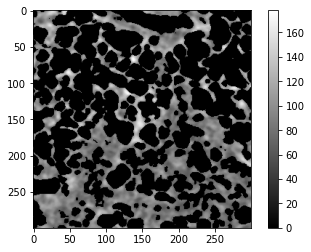

In [62]:
plt.imshow(img*aSlice, cmap='gray')
plt.colorbar()
plt.show()

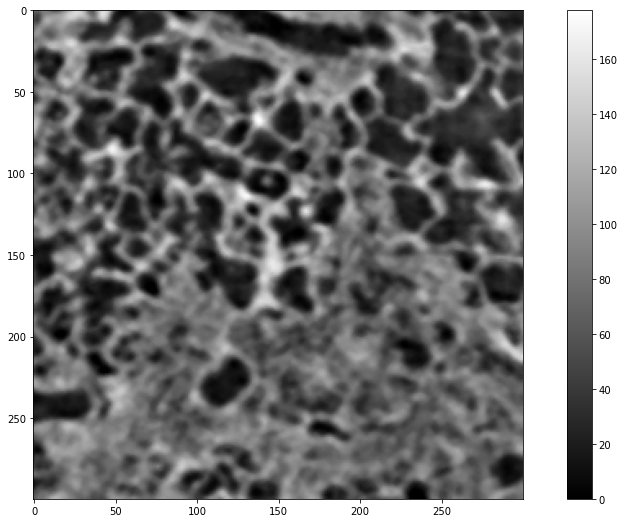

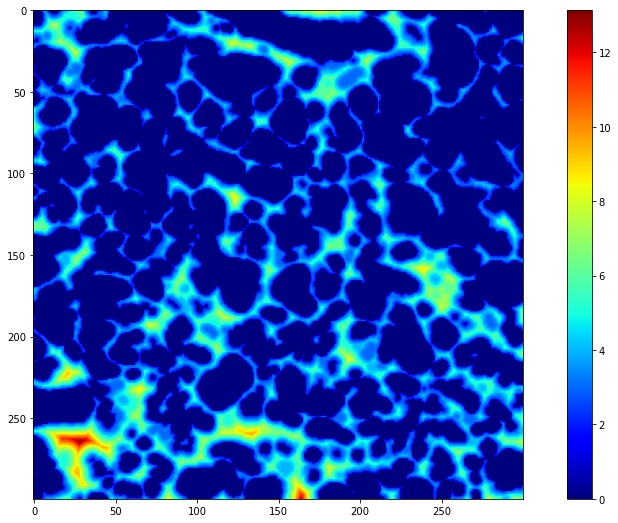

In [63]:
plt.figure(figsize=(16,9))
plt.imshow(vol[sliceNo, ...], cmap=plt.cm.gray)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,9))
plt.imshow(img*dis3d[sliceNo, ...], cmap=plt.cm.jet)
plt.colorbar()
plt.show()